In [56]:
%run ../utils.ipynb

In [57]:
g = M_(9.81, 0.01, 'м/с^2')
R = M_(114.6, 0.1, 'мм')
r = M_(30.2, 0.1, 'мм')
H = M_(214.4, 0.1, 'см')
Rk = M_(12.4, 0.05, 'см')
z0 = (H**2-Rk**2)**0.5
mm = M_(965.7, 0.5, 'г')
kk = (g * R * r / 4 / np.pi**2 / z0).to("мм^2/с^2")

# брусок
lb = M_(21.09, 0.01, 'см')
wb = M_(2.67, 0.01, 'см')
mb = M_(1077.0, 0.5, 'г') # TODO????

# кольцо
r_ring = M_(15.91, 0.01, 'см')/2
r_ring_inner = M_(15.08, 0.01, 'см')/2
m_ring = M_(776.6, 0.5, 'г')

# диск
rd = M_(17.04, 0.01, 'см')/2
md = M_(589.6, 0.5, 'г')

# половинки
rp = M_(9.28, 0.01, 'см') / 2
mp = M_(1536.2, 0.5, 'г')

In [58]:
df = pd.read_excel("data.ods", engine="odf", header=[0,1])
# df = ([(i,df[i].dropna().to_numpy()) for i in df.columns.levels[0]])
# df
_d = OrderedDict.fromkeys(df.columns.get_level_values(0))
for i in df.columns.levels[0]:
    _d[i] = df[i].dropna().to_numpy()
df = _d

df.keys()

odict_keys(['подвес', 'кольцо', 'диск', 'кольцо+диск', 'брусок горизонт', 'брусок вертик', 'раздв диск'])

In [59]:
def calc_t(v):
    return M_(np.mean(v[:,1]/v[:,0]), np.std(v[:,1]/v[:,0]), 'с')

In [89]:
I = (kk * mm * calc_t(df['подвес'])**2).to("г м^2")
I # [kg * m^2]

<Measurement(7.473471196383623, 0.15637692508585346, г * м ** 2)>

In [61]:
df.keys()

odict_keys(['подвес', 'кольцо', 'диск', 'кольцо+диск', 'брусок горизонт', 'брусок вертик', 'раздв диск'])

In [62]:
# calc_mean_t(df[list(df.keys())[0]]).magnitude

In [63]:
# Q_(np.array([calc_mean_t(df[k]) for k in df.keys() if k != 'раздв диск']), 'с')
# Q_(np.array([M_(0, 0, "г"), m_ring, md, m_ring + md, mb, mb]))



In [97]:
# for k in list(df.keys())[0:-1]:
#     v = df[k]
#     print(np.mean(v[:,1]/v[:,0]))


Tm = mk_numpy([calc_t(df[k]) for k in df.keys() if k != 'раздв диск'], 'с')
# Tm = M_(np.array([calc_mean_t(df[k]).magnitude for k in df.keys() if k != 'раздв диск']), 0, u.с)
# Tm = np.array(Tm)
# dTm = np.array([np.std(df[k][:,1]/df[k][:,0]) for k in df.keys() if k != 'раздв диск']) * u.с
m_array = mk_numpy([M_(0, 0, 'г'), m_ring, md, m_ring + md, mb, mb], 'г')
# I_array = np.array([0, (r_ring**2+r_ring_inner**2)/2, rd]) * m_array
# m_array * Tm
Im = (m_array + mm) * Tm ** 2 * kk.to("м^2/с^2")
Im = abs(Im - I)
Im = hack(Im)
# dTm

In [95]:
Tm, m_array, Im

(array([4.388723863636364+/-0.04521518901958271,
        4.16586+/-0.003920510170883285,
        3.9050200000000004+/-0.00341900570341746,
        3.8927199999999997+/-0.0012188519188156576,
        3.714866666666667+/-0.001438363267359352,
        2.977433333333334+/-0.004711923410054722], dtype=object) <Unit('с')>,
 array([0.0+/-0, 776.6+/-0.5, 589.6+/-0.5, 1366.2+/-0.7071067811865476,
        1077.0+/-0.5, 1077.0+/-0.5], dtype=object) <Unit('г')>,
 [0.0+/-0.2177777232375072 <Unit('г * м ** 2')>,
  4.6753992129559565+/-0.15662880520220432 <Unit('г * м ** 2')>,
  2.055901626705782+/-0.15510296617610628 <Unit('г * м ** 2')>,
  6.7242903112316315+/-0.15620155599110513 <Unit('г * м ** 2')>,
  3.853001223934828+/-0.15489398608419544 <Unit('г * м ** 2')>,
  -0.19747769374499224+/-0.15573038073663165 <Unit('г * м ** 2')>])

In [98]:
save()

In [86]:
I_ring = (m_ring * (r_ring**2+r_ring_inner**2)/2).to('г м^2')
Id = (md * rd**2 / 2).to('г м^2')
I_d_ring = Id+I_ring
Ib_hor = (mb / 12 * (wb ** 2 + lb ** 2)).to('г м^2')
Ib_vert = (mb / 12 * (wb ** 2) * 2).to('г м^2')
# Ith = hack(mk_numpy([I_ring, Id, I_d_ring, Ib_hor, Ib_vert], 'г м^2'))
# type(Ith[0])

In [90]:
save()

In [85]:
type(I_ring)

pint.Measurement

In [83]:
wb

<Measurement(2.67, 0.01, см)>

In [81]:
save()

In [67]:
I1 = mm * Rk**2/2 # kg * m^2
print((I.value - I1.value)/I.value) # погрешность 6.5% от теории
I1 = I1.to("г м^2")
I1

-992.4207819778024 dimensionless


<Measurement(7.424301600000002, 0.05999666960390385, г * м ** 2)>

In [68]:
# for _k in list(df.keys())[0:-1]:
#     _v = df[_k]
#     _m = _v[:,1]/_v[:,0]
#     print(np.mean(_m), np.std(_m))
#     # std << 0.001 - пренебречь


In [69]:
type(I1.magnitude)

uncertainties.core.AffineScalarFunc

In [70]:
type(np.array([1]))

numpy.ndarray

In [71]:
# iter(1)


In [72]:


# M_(np.array([1, 2, 3]), [3, 4, 5], 'с')

In [116]:
_df1 = df['раздв диск']
t = (_df1[:, 1] / _df1[:, 0]) * u.с
d = M_(_df1[:, 2] - 0, 0.1, 'см')/2
# d[0] = 13.5
Ip =t**2 *(mm+mp)*kk.to("м^2/с^2") - I
# Ip, d
# _df1
d, Ip

(array([0.5+/-0.05, 0.5+/-0.05, 0.5+/-0.05, 0.5+/-0.05, 0.5+/-0.05,
        0.5+/-0.05, 1.0+/-0.05, 1.0+/-0.05, 1.0+/-0.05, 1.5+/-0.05,
        1.5+/-0.05, 1.5+/-0.05, 2.0+/-0.05, 2.0+/-0.05, 2.0+/-0.05,
        2.5+/-0.05, 2.5+/-0.05, 2.5+/-0.05, 3.0+/-0.05, 3.0+/-0.05,
        3.0+/-0.05, 3.5+/-0.05, 3.5+/-0.05, 3.5+/-0.05, 4.0+/-0.05,
        4.0+/-0.05, 4.0+/-0.05, 4.5+/-0.05, 4.5+/-0.05, 4.5+/-0.05],
       dtype=object) <Unit('см')>,
 array([1.7775611579995774+/-0.15414958924267697,
        1.8129694390048856+/-0.1541549359158751,
        1.7830511132841744+/-0.1541504112816057,
        1.7903735868906425+/-0.15415151168147692,
        1.7854916161400434+/-0.15415077752922812,
        1.76597660032244+/-0.1541478629953598,
        1.9583578207507477+/-0.15417800135664522,
        1.94850702575219+/-0.15417638209917603,
        1.9386613776275494+/-0.15417477188686207,
        2.1776233349878167+/-0.15421616733955823,
        2.1807383497440656+/-0.1542167388207675,
        2.1266

In [74]:
# def np_split(arr):
#     return np.array([(i.n, i.s) for i in arr.magnitude]) * arr.units
# np_split(Ip)

In [75]:
# def errorbar(x, y):
#     x = np_split(x)
#     y = np_split(y)
#     # print(x[:, 0])
#     plt.grid()
#     plt.errorbar(x[:, 0], y[:, 0], yerr=y[:, 1], xerr=x[:, 1], fmt='k.')
#     plt.gca().xaxis.set_units(x.units)
#     plt.gca().yaxis.set_units(y.units)
#     # print(x[:, 0])

# def plot(x, y):
#     x = np_split(x)
#     y = np_split(y)
#     # print(x[:, 0])
#     plt.grid()
#     plt.plot(x[:, 0], y[:, 0], 'k.')


# def polyfit(x, y):
#     x = np_split(x)
#     y = np_split(y)
#     ((k, b), cov) = np.polyfit(x[:, 0].magnitude, y[:, 0].magnitude, deg=1, w=1/y[:, 1].magnitude, cov=True)
#     err = np.sqrt(np.diag(cov))
#     return (M_(k, err[0], (1 * y.units * (x.units)**-1)).to_reduced_units(), M_(b, err[1], (1 * y.units)))

# def minmax(x):
#     x = np_split(x)
#     return mk_numpy([x.min(), x.max()], x.units)

# polyfit(_x, _y)

In [76]:
# polyfit(_x, _y)
# k, b, polyfit(_x, _y), minmax(_x)

In [77]:
# _xx

(<Measurement(1596.973015567785, 8.169911866727178, г)>,
 <Measurement(1.7788205170580922, 0.007977230976383623, г * м ** 2)>)

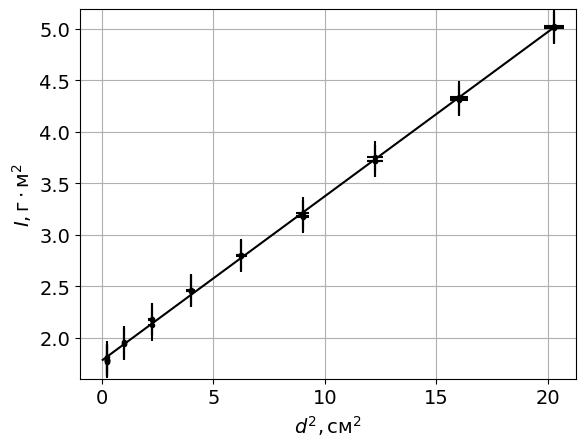

In [117]:
_x = d*d
_y = Ip
# k, b = np.polyfit(_x, _y, deg=1)
k, b = polyfit(_x, _y)
_xx = minmax(_x)
# _y
# plt.plot(Q_([1, 2, 3], 'с'), Q_([1, 2, 3], 'с'), 'k.')
errorbar(_x, _y)
# _xa.set_label("test")
# _xa.label
plt.ylabel(f"$I, {plt.gca().yaxis.get_units():L}$")
plt.xlabel(f"$d^2, {plt.gca().xaxis.get_units():L}$")
# errorbar(_x, _y)
# plt.set_units('с')
# plt.plot(_xx, (_xx - b.value)/k.value, 'k')
plt.plot(_xx, _xx * k.value + b.value, 'k')
plt.savefig('p7.svg')
# print(k, b) #693052.4380749518 142638667.79984942
# _xa = plt.gca().xaxis
# _xa.get_units()

# plt.show()
k, b

In [109]:
Ipp = (mp * rp**2/2).to('г м^2')
Ipp

<Measurement(1.6536885760000002, 0.003604397903930142, г * м ** 2)>

In [112]:
mp

<Measurement(1536.2, 0.5, г)>

In [113]:
save()